/usr/local/lib/python3.10/dist-packages/torch/__init__.py:1954: RuntimeWarning: coroutine 'Server.serve' was never awaited
  _C._initExtension(_manager_path())


Epoch [200/2000], d_loss: 0.6960, g_loss: 1.1246
Epoch [400/2000], d_loss: 0.6454, g_loss: 0.5397
Epoch [600/2000], d_loss: 0.5420, g_loss: 0.7518
Epoch [800/2000], d_loss: 0.7035, g_loss: 0.9765
Epoch [1000/2000], d_loss: 0.4152, g_loss: 1.1018
Epoch [1200/2000], d_loss: 0.6715, g_loss: 0.6844
Epoch [1400/2000], d_loss: 0.7083, g_loss: 0.8468
Epoch [1600/2000], d_loss: 0.6675, g_loss: 0.5917
Epoch [1800/2000], d_loss: 0.6956, g_loss: 0.9502
Epoch [2000/2000], d_loss: 0.6700, g_loss: 0.7121


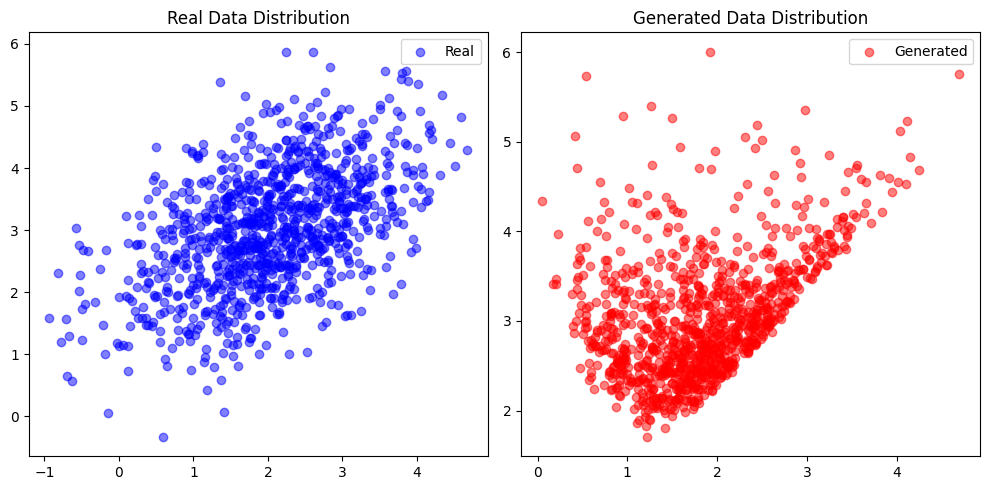

In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
torch.manual_seed(42)

# Generate real data samples from a 2D Gaussian distribution
def generate_real_samples(n_samples):
    mean = [2, 3]
    cov = [[1, 0.5], [0.5, 1]]
    real_data = np.random.multivariate_normal(mean, cov, n_samples)
    return torch.FloatTensor(real_data)

# Generator Network
class Generator(nn.Module):
    def __init__(self, latent_dim):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(latent_dim, 16),
            nn.ReLU(),
            nn.Linear(16, 32),
            nn.ReLU(),
            nn.Linear(32, 2)  # Output 2D points
        )

    def forward(self, z):
        return self.model(z)

# Discriminator Network
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

# Training parameters
latent_dim = 8
n_samples = 1000
batch_size = 32
n_epochs = 2000

# Initialize networks and optimizers
generator = Generator(latent_dim)
discriminator = Discriminator()

g_optimizer = optim.Adam(generator.parameters(), lr=0.001)
d_optimizer = optim.Adam(discriminator.parameters(), lr=0.001)

criterion = nn.BCELoss()

# Training loop
for epoch in range(n_epochs):
    # Train Discriminator
    d_optimizer.zero_grad()

    # Real samples
    real_data = generate_real_samples(batch_size)
    real_labels = torch.ones(batch_size, 1)

    # Generated samples
    z = torch.randn(batch_size, latent_dim)
    fake_data = generator(z).detach()
    fake_labels = torch.zeros(batch_size, 1)

    # Train on real and fake samples
    d_loss_real = criterion(discriminator(real_data), real_labels)
    d_loss_fake = criterion(discriminator(fake_data), fake_labels)
    d_loss = (d_loss_real + d_loss_fake) / 2

    d_loss.backward()
    d_optimizer.step()

    # Train Generator
    g_optimizer.zero_grad()

    z = torch.randn(batch_size, latent_dim)
    fake_data = generator(z)
    fake_labels = torch.ones(batch_size, 1)  # Try to fool discriminator

    g_loss = criterion(discriminator(fake_data), fake_labels)

    g_loss.backward()
    g_optimizer.step()

    if (epoch + 1) % 200 == 0:
        print(f'Epoch [{epoch+1}/{n_epochs}], d_loss: {d_loss.item():.4f}, g_loss: {g_loss.item():.4f}')

# Visualization function
def visualize_results():
    with torch.no_grad():
        # Generate samples
        z = torch.randn(1000, latent_dim)
        generated_data = generator(z).numpy()

        # Get real samples
        real_data = generate_real_samples(1000).numpy()

        # Plot
        plt.figure(figsize=(10, 5))

        plt.subplot(1, 2, 1)
        plt.scatter(real_data[:, 0], real_data[:, 1], c='blue', alpha=0.5, label='Real')
        plt.title('Real Data Distribution')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.scatter(generated_data[:, 0], generated_data[:, 1], c='red', alpha=0.5, label='Generated')
        plt.title('Generated Data Distribution')
        plt.legend()

        plt.tight_layout()
        plt.show()

# Visualize the results
visualize_results()